In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 1919.5, 959.5, -0.5)

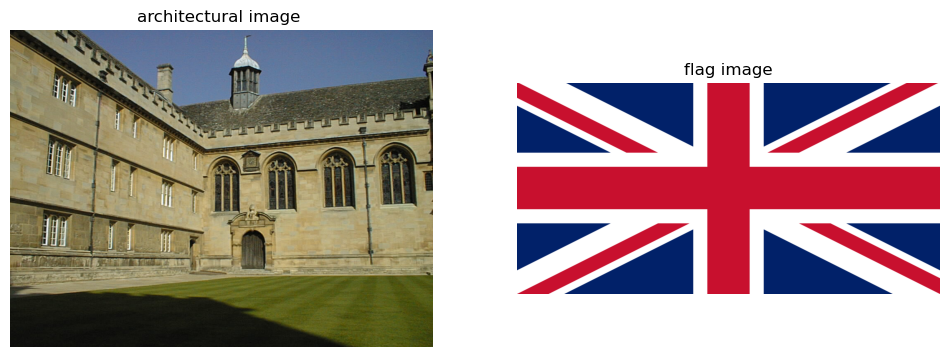

In [7]:
# Load images
architectural_image = cv.imread("../../images/005.jpg")  
flag_image = cv.imread("../../images/flag.png", cv.IMREAD_UNCHANGED) 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(architectural_image, cv.COLOR_BGR2RGB))
plt.title('architectural image ')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(flag_image, cv.COLOR_BGR2RGB))
plt.title('flag image')
plt.axis('off')

In [8]:
# Function to select points on the image
def select_points(event, x, y, flags, param):
    global points, img_copy
    if event == cv.EVENT_LBUTTONDOWN:
        points.append((x, y))
        cv.circle(img_copy, (x, y), 5, (0, 255, 0), -1)
        cv.imshow("Image", img_copy)


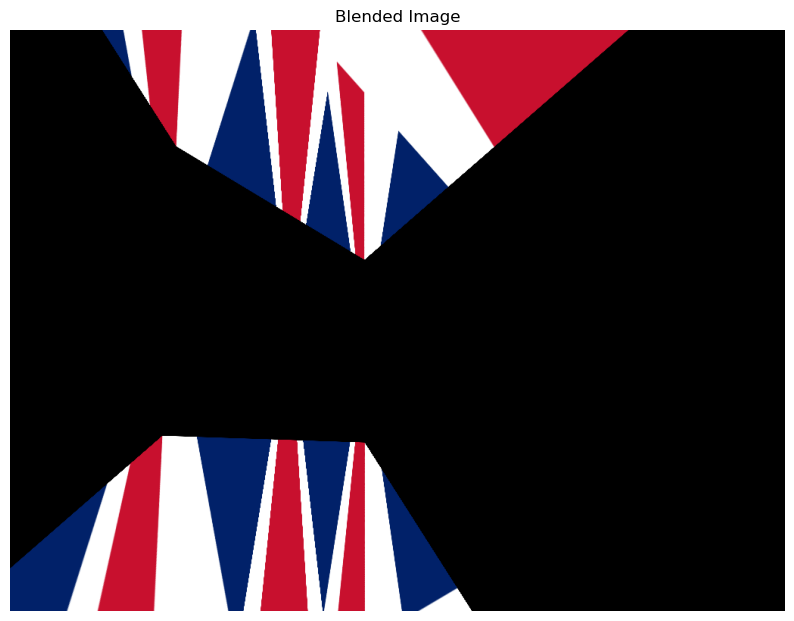

In [10]:
# Prepare variables for point selection
points = []
img_copy = architectural_image.copy()

# Show the architectural image and set up point selection
cv.imshow("Image", img_copy)
cv.setMouseCallback("Image", select_points)
cv.waitKey(0)
cv.destroyAllWindows()

# Ensure we have four points
if len(points) != 4:
    raise ValueError("You must select exactly four points.")

# Define the corresponding points in the flag image
flag_height, flag_width = flag_image.shape[:2]
flag_corners = np.array([[0, 0], [flag_width, 0], [flag_width, flag_height], [0, flag_height]], dtype="float32")

# Compute the homography
points = np.array(points, dtype="float32")
homography_matrix, _ = cv.findHomography(flag_corners, points)

# Warp the flag image to the architectural image
warped_flag = cv.warpPerspective(flag_image, homography_matrix, (architectural_image.shape[1], architectural_image.shape[0]))

# Check if the warped flag has an alpha channel
if warped_flag.shape[2] == 4:  # If there is an alpha channel
    flag_mask = (warped_flag[..., 3] > 0).astype(np.uint8)  # Get the alpha channel for masking
    warped_flag_rgb = warped_flag[..., :3]  # Get the RGB channels of the warped flag
else:
    flag_mask = np.ones_like(warped_flag[..., 0], dtype=np.uint8)  # Create a mask of ones (fully opaque)
    warped_flag_rgb = warped_flag  # Use the RGB channels directly

# Blend the images
blended_image = architectural_image.copy()
for c in range(0, 3):
    blended_image[..., c] = blended_image[..., c] * (1 - flag_mask) + warped_flag_rgb[..., c] * flag_mask

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Blended Image")
plt.show()
